# House Price Prediction - Random Forest Regression
- A Random Forest Algorithm is nothing but a collection of decision trees.
- Many trees are grouped together in a random way in order to create  a Random Forest.
- Every tree is constructed from  a different sample of rows.
- At each node , a different set of features is selected for splitting.
- Each and every tree makes its own independent prediction.
- All theses results are summarized in order to produce the final result.
- Averaging process makes the Random Forest Algorithm a better algorithm when compared to other types of algorithms.
- Averaging process improves the accuracy and reduces overfitting.
- It is an average of predictions produced by all the trees in the forest.
- The trees protect each other from  their individual errrors.
- It averages the result of many regression trees and produces the most optimal result.


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
train = pd.read_csv("http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv")
test = pd.read_csv("http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Pre-processing

C:\Users\ZARRAR\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

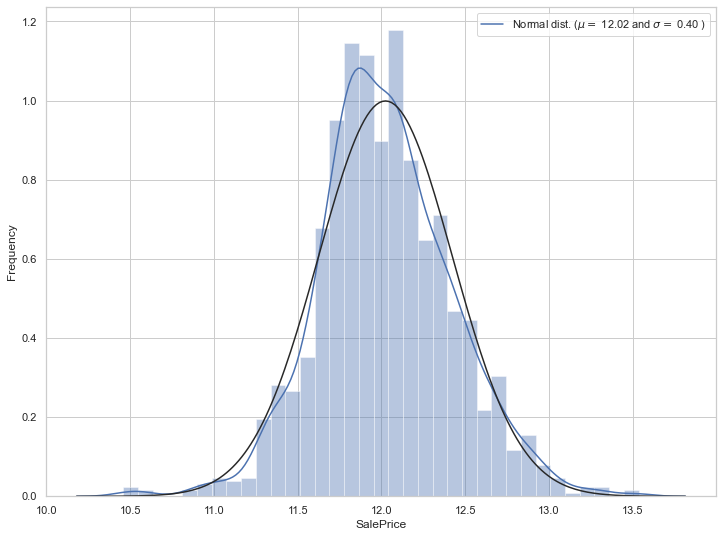

In [41]:
# Normal Distributuion = Histogram
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

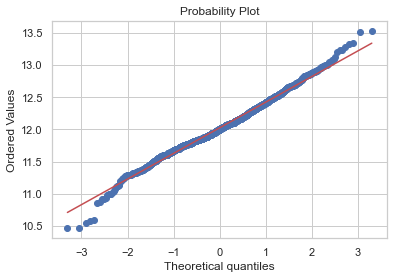

In [42]:
# Probablity plot
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [43]:
# we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])
# This mathematical function helps user to calculate 
# natural logarithmic value of x+1 where x belongs to all the input array elements.

C:\Users\ZARRAR\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


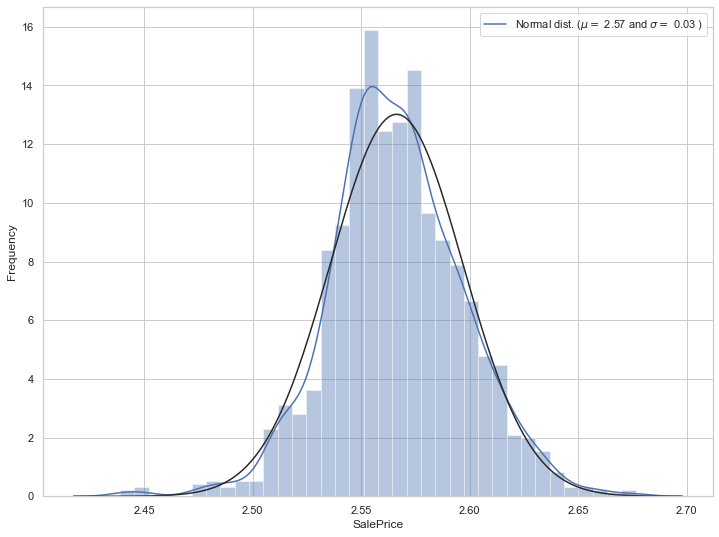

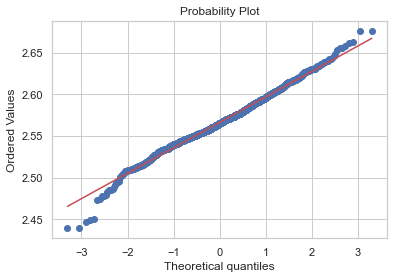

In [44]:
# Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)
# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [45]:
#Let's check if the data set has any missing values. 
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

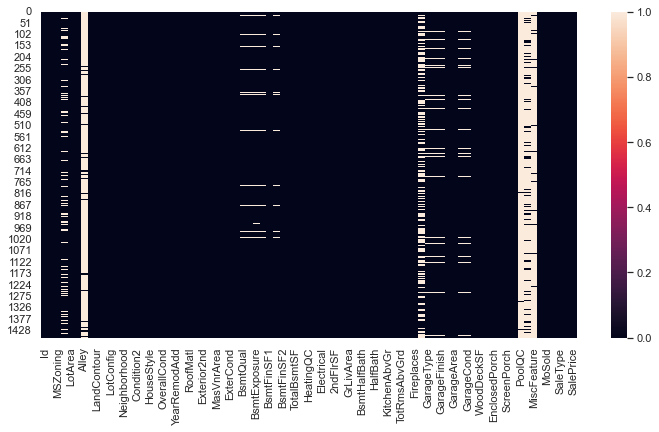

In [46]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

In [64]:
#missing value counts in each of these columns
def calc_null():
    Isnull = train.isnull().sum()/len(train)*100
    Isnull = Isnull[Isnull>0]
    Isnull.sort_values(inplace=True, ascending=False)
    print(Isnull)
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [48]:
#Convert into dataframe
Isnull = Isnull.to_frame()
Isnull

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [49]:
# count = percentage_of_null_values
Isnull.columns = ['count']
Isnull

,count
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [50]:
Isnull.index.names = ['Name']
Isnull


,count
Name,
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


In [51]:
Isnull['Name'] = Isnull.index
Isnull

,count,Name
Name,,
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley
Fence,80.753425,Fence
FireplaceQu,47.260274,FireplaceQu
LotFrontage,17.739726,LotFrontage
GarageType,5.547945,GarageType
GarageYrBlt,5.547945,GarageYrBlt
GarageFinish,5.547945,GarageFinish


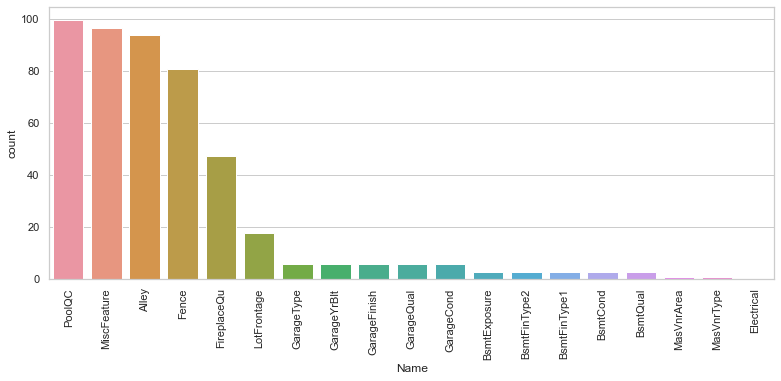

In [52]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

In [53]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = train.select_dtypes(include=[np.number])
train_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [54]:
#Delete Id because that is not need for corralation plot
del train_corr['Id']

<AxesSubplot:>

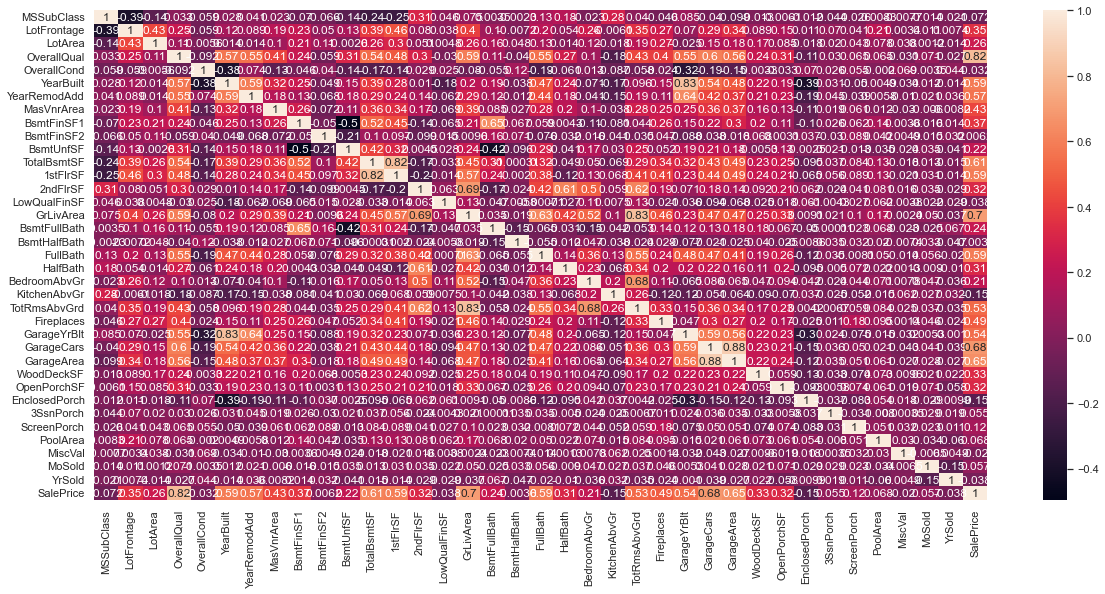

In [55]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

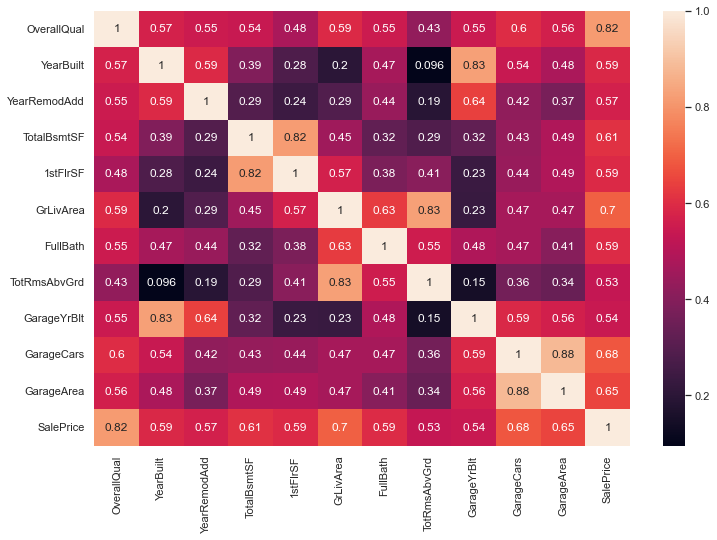

In [56]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [57]:
#unique value of OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

C:\Users\ZARRAR\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

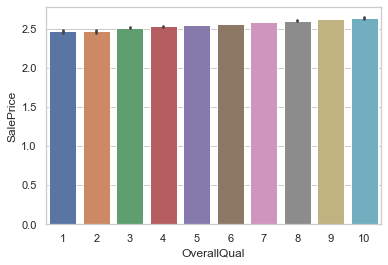

In [58]:
sns.barplot(train.OverallQual, train.SalePrice)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

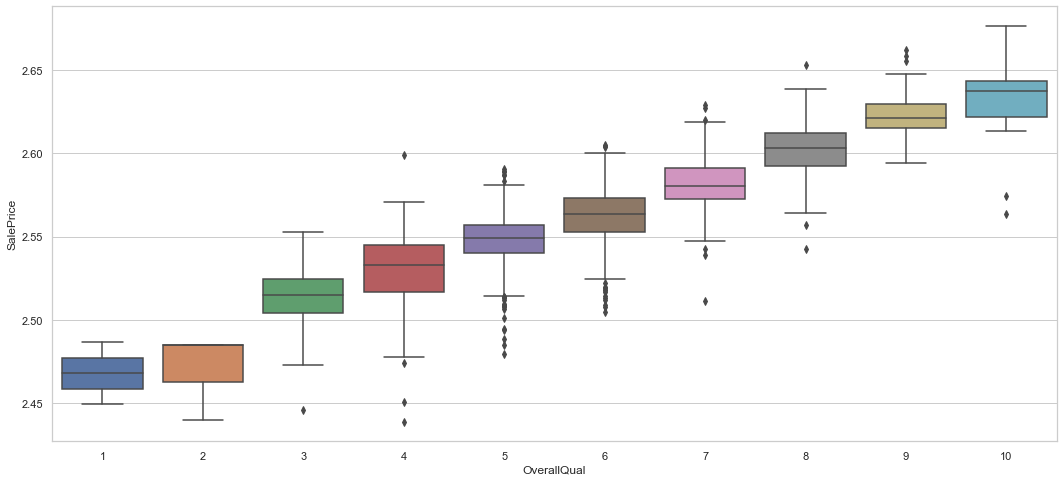

In [59]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

C:\Users\ZARRAR\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


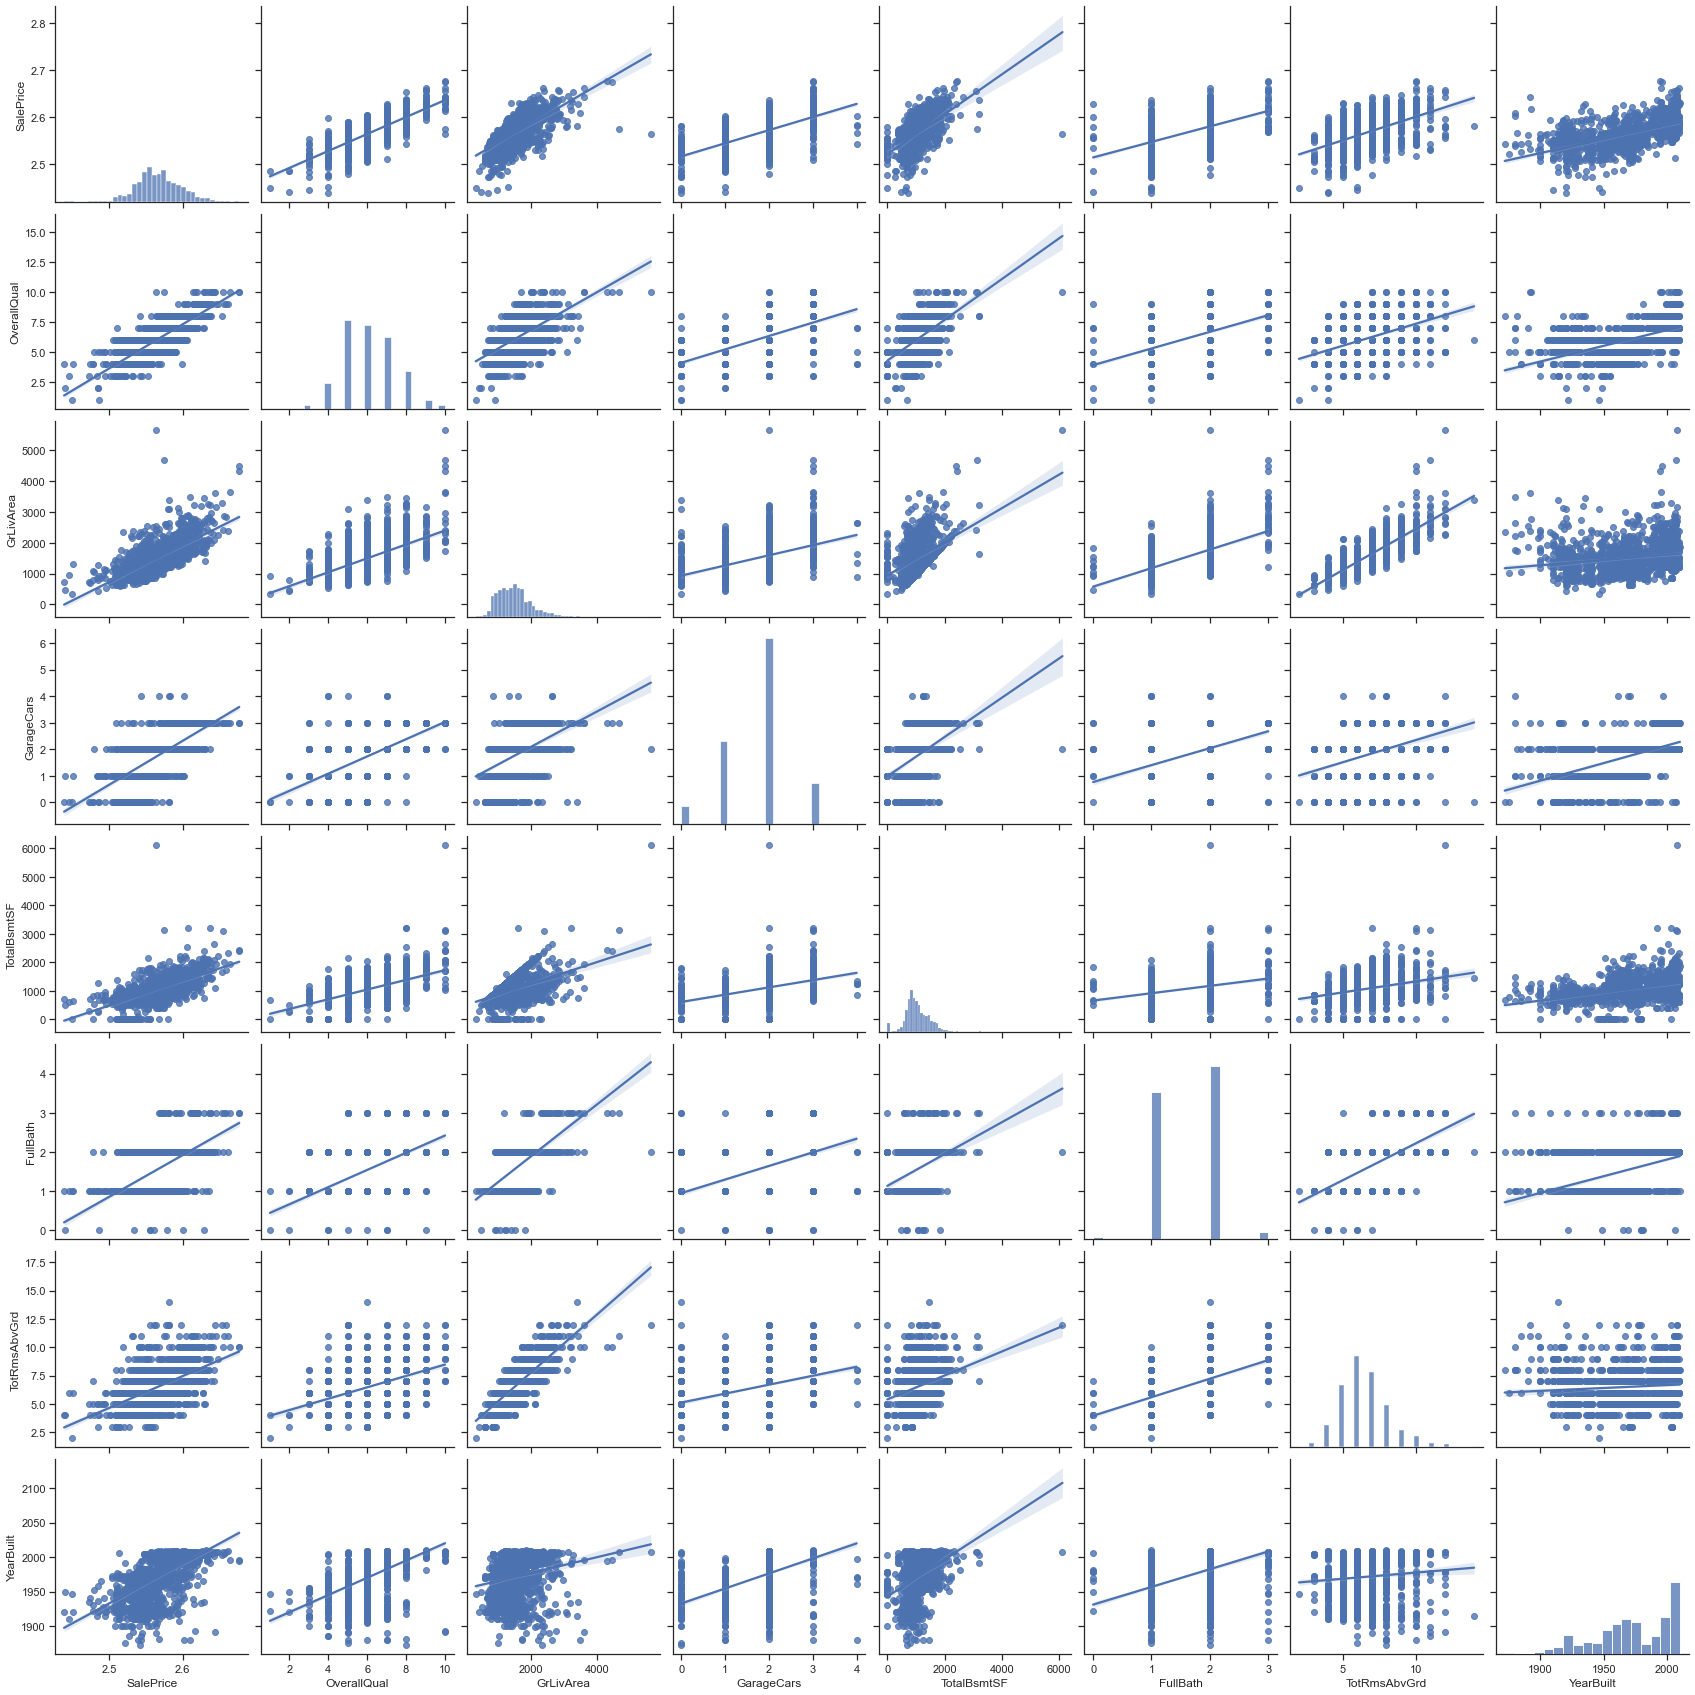

In [60]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [61]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.815005
GrLivArea        0.697001
GarageCars       0.680156
GarageArea       0.649601
TotalBsmtSF      0.609138
FullBath         0.593950
1stFlrSF         0.593533
YearBuilt        0.587947
YearRemodAdd     0.566811
GarageYrBlt      0.542620
TotRmsAbvGrd     0.532015
Fireplaces       0.488470
MasVnrArea       0.425387
BsmtFinSF1       0.369589
LotFrontage      0.354315
WoodDeckSF       0.333100
OpenPorchSF      0.318779
2ndFlrSF         0.317684
HalfBath         0.314638
LotArea          0.255382
BsmtFullBath     0.235692
BsmtUnfSF        0.221007
BedroomAbvGr     0.211759
ScreenPorch      0.121453
PoolArea         0.068439
MoSold           0.057420
3SsnPorch        0.055326
BsmtFinSF2       0.006248
BsmtHalfBath    -0.003625
Id              -0.017318
MiscVal         -0.019939
OverallCond     -0.032208
YrSold          -0.037897
LowQualFinSF    -0.038467
MSSubClass      -0.072460
KitchenAbvGr    -0.147227
EnclosedPorch   -0.149860
Name: SalePr

In [65]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')
calc_null()

MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


In [66]:
#Arround 50% missing values attributes have been fill by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
calc_null()

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [67]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [68]:
#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

In [69]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [73]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')
calc_null()

Electrical    0.068493
dtype: float64


In [74]:
#MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [75]:
#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [81]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
calc_null()

Series([], dtype: float64)


In [82]:
#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:>

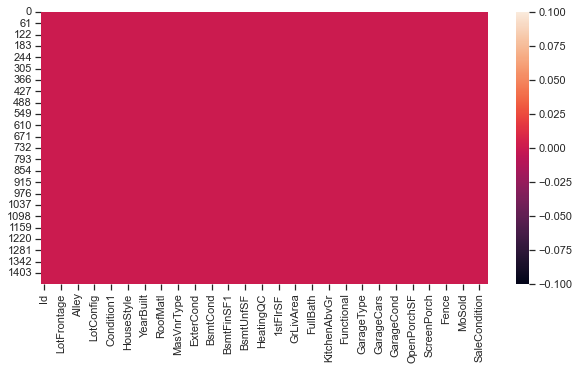

In [83]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

In [84]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood','Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [85]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int32  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int32  
 18  YearBuil

In [86]:
#Take targate variable into y
y = train['SalePrice']

In [87]:
#Delete the saleprice
del train['SalePrice']

In [88]:
#Take their values in X and y
X = train.values
y = y.values

In [89]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Linear Regression

In [98]:
#Train the model
from sklearn import linear_model
model_LR = linear_model.LinearRegression()

In [99]:
#Fit the model
model_LR.fit(X_train, y_train)

LinearRegression()

In [100]:
#Prediction
print("Predict value " + str(model_LR.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [2.5346869]
Real value 2.5468784238831312


In [109]:
#Score/Accuracy
Accuracy_LR = model_LR.score(X_test, y_test)*100
print("Accuracy --> ", Accuracy_LR)

Accuracy -->  88.77575294857786


# Random Forest Regressor

In [103]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor(n_estimators=1000)

In [104]:
#Fit
model_RFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [110]:
#Prediction
print("Predict value " + str(model_RFR.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
#Score/Accuracy
Accuracy_RFR = model_RFR.score(X_test, y_test)*100
print("Accuracy --> ", Accuracy_RFR)

Predict value [2.5414136]
Real value 2.5468784238831312
Accuracy -->  89.28840703927109


# Gradient Boosting Regressor

In [106]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
model_GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [107]:
#Fit
model_GBR.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [111]:
#Prediction
print("Predict value " + str(model_GBR.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
#Score/Accuracy
Accuracy_GBR = model_GBR.score(X_test, y_test)*100
print("Accuracy --> ", Accuracy_GBR)

Predict value [2.53789598]
Real value 2.5468784238831312
Accuracy -->  91.26584991735544


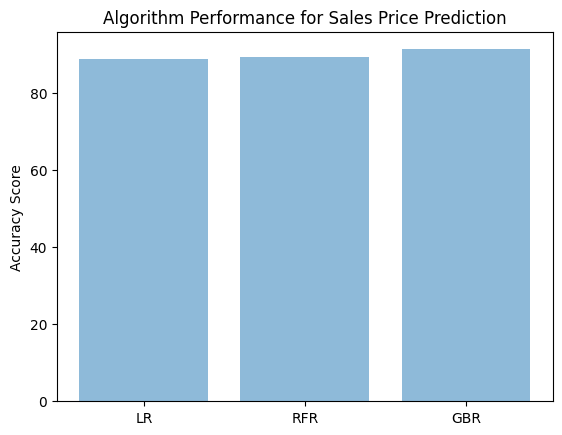

In [112]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('LR','RFR', 'GBR')
y_pos = np.arange(len(objects))
performance = [Accuracy_LR, Accuracy_RFR, Accuracy_GBR]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Algorithm Performance for Sales Price Prediction')

plt.show()